In [1]:
# імпорт бібліотек
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

%matplotlib inline

from sklearn.preprocessing import LabelEncoder

import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
from scipy.stats import shapiro

import warnings
warnings.filterwarnings('ignore')

In [2]:
# завантаження даних
df = pd.read_csv(r'C:\Users\adima\Desktop\thesis\data_overview\data\ready_data.csv', index_col='Date')

In [3]:
# описательные статистики
df.describe()

BZ=F_oil     CL=F_oil          GLD         SI=F         AAPL  \
count  4106.000000  4106.000000  4106.000000  4106.000000  4106.000000   
mean     76.346851    69.231024   133.672077    21.169474    35.839483   
std      26.716052    22.966948    20.924474     6.819617    27.965748   
min      19.330000    10.010000   100.500000    11.735000     6.858929   
25%      54.012498    49.712499   118.129998    16.356251    17.884999   
50%      70.304997    64.005001   125.540001    18.041000    27.265000   
75%     106.730003    92.057499   151.045002    25.239750    43.692500   
max     126.650002   113.930000   193.889999    45.057999   143.160004   

               BAC            C           CS           DB  \
count  4106.000000  4106.000000  4106.000000  4106.000000   
mean     19.015717    51.659657    22.574363    28.901501   
std       7.877483    13.340785    10.421852    17.471474   
min       4.990000    23.110001     6.670000     5.480000   
25%      13.480000    42.400001    13.690000    12.550833   
50%      16.511667    50.250000    21.086407    29.202569   
75%      25.737500    61.853749    28.687911    42.468989   
max      39.490002    81.910004    53.291016    77.977097   

       GSBD(march-19-2015)  ...         VWAP          MFI  google_trends  \
count          4106.000000  ...  4106.000000  4106.000000    4106.000000   
mean             20.382376  ...   181.350306    51.849737      12.627312   
std               1.791604  ...    45.261617    20.822482       5.004696   
min               8.380000  ...    91.111950     3.840423       0.800000   
25%              20.379999  ...   153.833472    36.235718       8.930000   
50%              20.382376  ...   176.698671    51.341768      12.285000   
75%              20.712499  ...   212.149230    68.505201      15.945000   
max              25.430000  ...   343.512025   100.000000      29.000000   

          inv_fft3     inv_fft6     inv_fft9    inv_fft20   inv_fft100  \
count  4106.000000  4106.000000  4106.000000  4106.000000  4106.000000   
mean    181.676381   181.676381   181.676381   181.676381   181.676381   
std      35.634221    39.318903    41.516486    43.913675    45.557502   
min     112.699920   102.667412    93.812643    93.710893    91.724305   
25%     156.430424   159.634383   153.181559   155.035550   153.559982   
50%     184.497430   185.566421   185.041904   183.511158   177.271513   
75%     214.083427   211.245650   214.175749   210.664607   212.632523   
max     226.474875   250.851307   255.198642   293.293845   352.918377   

          maxlogit           GS  
count  4106.000000  4106.000000  
mean      1.179935   181.676381  
std       0.807737    45.815498  
min      -0.234170    87.699997  
25%       0.519149   153.605005  
50%       1.206381   176.728335  
75%       1.842926   213.165832  
max       3.050029   348.809998  

[8 rows x 82 columns]

In [4]:
# кореляція
corr = df.corr()
corr['GS'][:60]

BZ=F_oil              -0.562204
CL=F_oil              -0.522578
GLD                   -0.240783
SI=F                  -0.525969
AAPL                   0.657123
BAC                    0.898719
C                      0.889560
CS                    -0.436286
DB                    -0.582808
GSBD(march-19-2015)    0.152195
HRI                    0.298719
JPM                    0.867842
LYG                    0.079602
MAN                    0.867409
MS                     0.959375
MUFG                   0.464023
UBS                    0.152807
CNYUSD=X              -0.332710
EURUSD=X              -0.524463
GBPUSD=X              -0.610569
JPYUSD=X              -0.722480
RUBUSD=X              -0.705996
google_trends_GS       0.052117
10YBIR                -0.206854
DFF                    0.465631
LIBOR                  0.460563
10YearBondUS          -0.041321
TNX                   -0.041446
VIX                   -0.257333
CPALTT01USM657N        0.146844
M2SL                   0.723662
MEDCPIM1

In [5]:
corr['GS'][60:]

BaseLine          0.987030
ConversionLine    0.995895
MassIndex         0.064117
Stoch             0.119104
StochSignal       0.128866
rsi               0.192098
EMA12             0.995895
EMA26             0.989695
MACD              0.319423
GSshift1          0.998554
ROC7              0.105716
momentum          0.105716
VWAP              0.993590
MFI               0.097655
google_trends     0.082981
inv_fft3          0.811851
inv_fft6          0.865835
inv_fft9          0.916056
inv_fft20         0.960762
inv_fft100        0.994384
maxlogit         -0.018097
GS                1.000000
Name: GS, dtype: float64

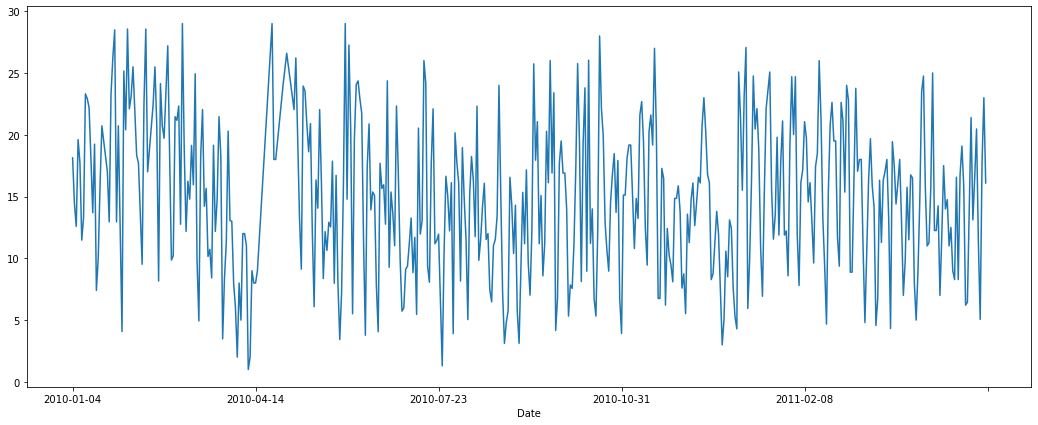

In [7]:
df['google_trends'].iloc[:500].plot(figsize=(18,7));

### EDA

In [8]:
# розмірність
df.shape

(4106, 83)

In [9]:
# кількість пропущених значень
df.isna().sum().sum()

0

In [10]:
cat_vals = df['sentiment'].value_counts()
cat_vals

neutral     2006
negative    1435
positive     665
Name: sentiment, dtype: int64

In [11]:
# barchart кіькість нейтральних, негативних та позитивних новин
x = cat_vals.index
y = cat_vals.values
fig = go.Figure(data=[go.Bar(
            x=x, y=y,
            text=y,
            textposition='auto',
        )])

fig.update_layout(
    title="Sentiment Score Values",
    xaxis_title="Sentiment",
    yaxis_title="Quantity",
    autosize=False)
fig.show()

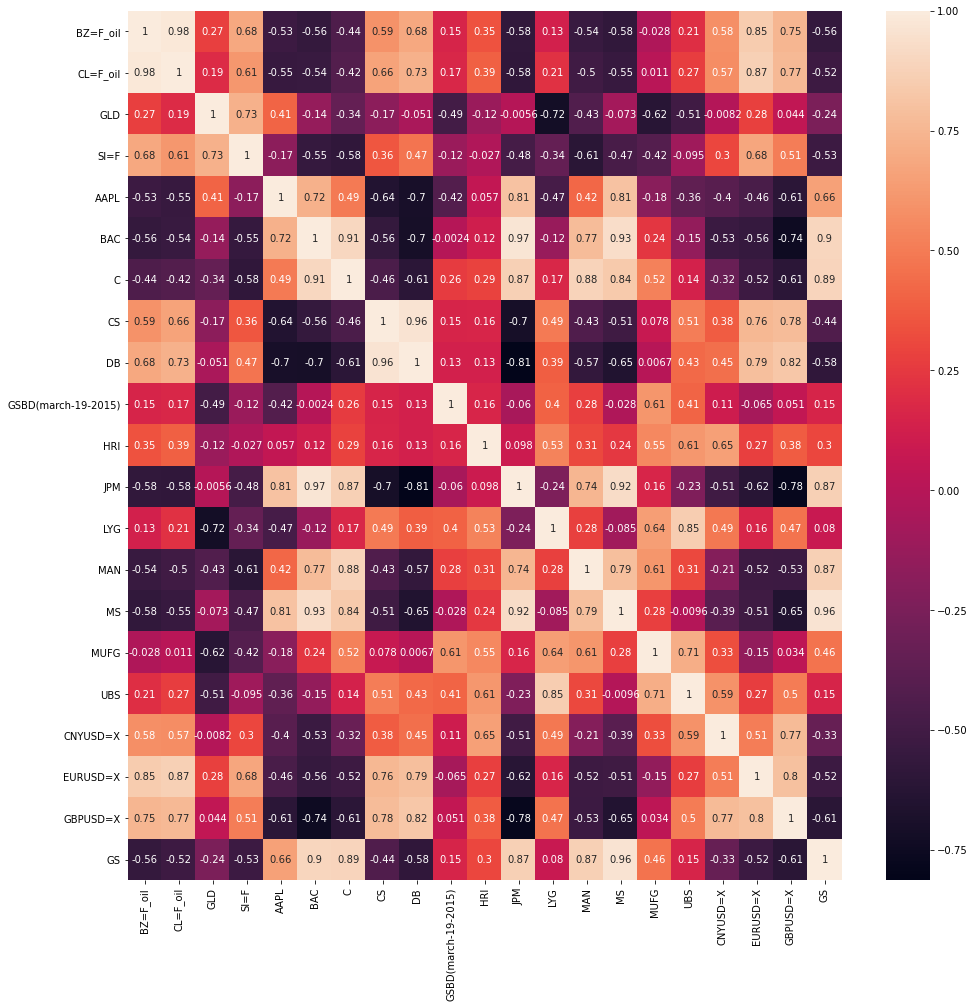

In [11]:
# кореляційна матриця
# дані компаній
corr_cols = df.columns.tolist()
plt.figure(figsize = (16,16))
sns.heatmap(df[corr_cols[0:20] + ['GS']].corr(), annot=True);

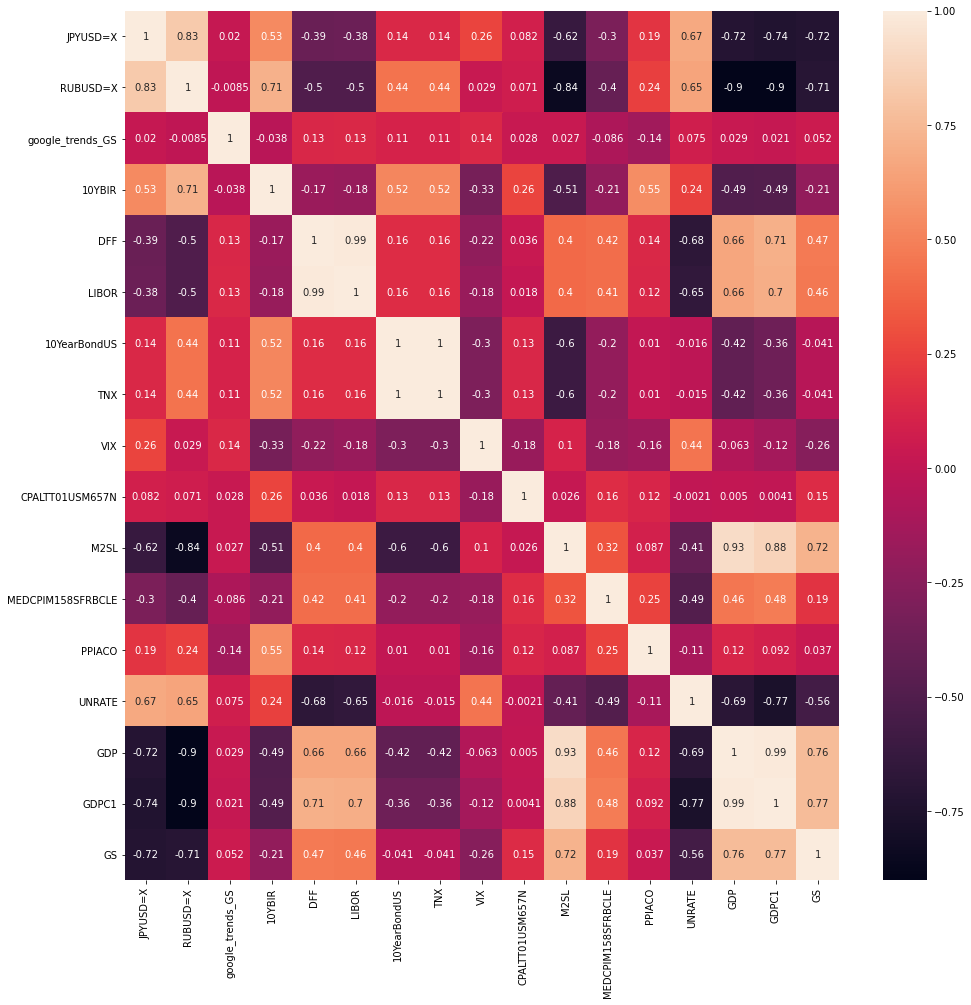

In [12]:
# дані валют та економічних індексів
plt.figure(figsize = (16,16))
sns.heatmap(df[corr_cols[20:36] + ['GS']].corr(), annot=True);

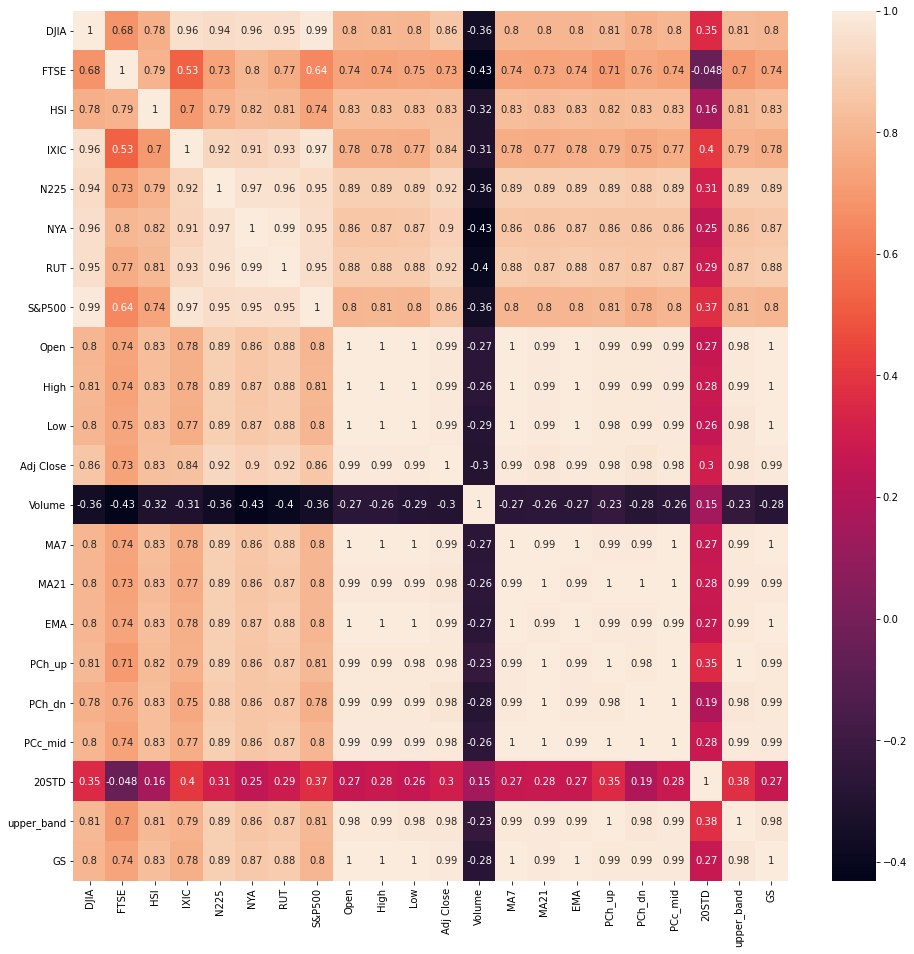

In [13]:
# дати біржевих індексів та ТА
plt.figure(figsize = (16,16))
sns.heatmap(df[corr_cols[36:57] + ['GS']].corr(), annot=True);

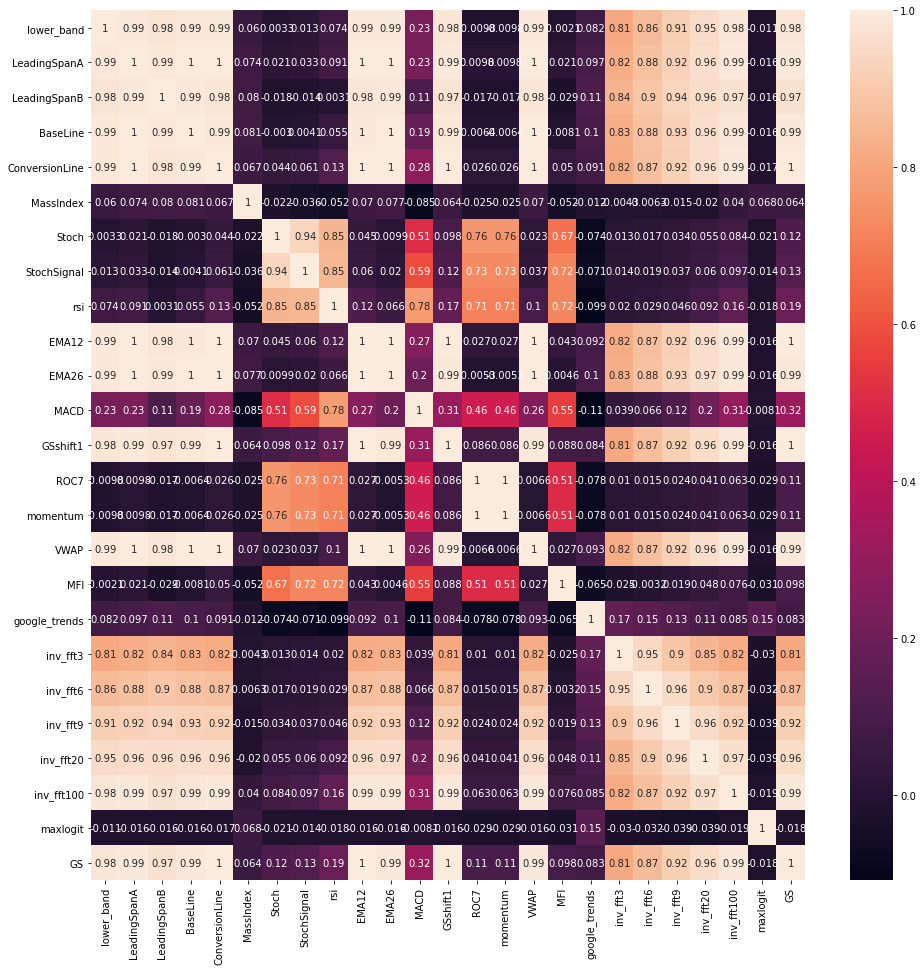

In [15]:
# дані ТА та ШПФ
plt.figure(figsize = (16,16))
sns.heatmap(df[corr_cols[57:]].corr(), annot=True);

In [17]:
df.columns

Index(['BZ=F_oil', 'CL=F_oil', 'GLD', 'SI=F', 'AAPL', 'BAC', 'C', 'CS', 'DB',
       'GSBD(march-19-2015)', 'HRI', 'JPM', 'LYG', 'MAN', 'MS', 'MUFG', 'UBS',
       'CNYUSD=X', 'EURUSD=X', 'GBPUSD=X', 'JPYUSD=X', 'RUBUSD=X',
       'google_trends_GS', '10YBIR', 'DFF', 'LIBOR', '10YearBondUS', 'TNX',
       'VIX', 'CPALTT01USM657N', 'M2SL', 'MEDCPIM158SFRBCLE', 'PPIACO',
       'UNRATE', 'GDP', 'GDPC1', 'DJIA', 'FTSE', 'HSI', 'IXIC', 'N225', 'NYA',
       'RUT', 'S&P500', 'Open', 'High', 'Low', 'Adj Close', 'Volume', 'MA7',
       'MA21', 'EMA', 'PCh_up', 'PCh_dn', 'PCc_mid', '20STD', 'upper_band',
       'lower_band', 'LeadingSpanA', 'LeadingSpanB', 'BaseLine',
       'ConversionLine', 'MassIndex', 'Stoch', 'StochSignal', 'rsi', 'EMA12',
       'EMA26', 'MACD', 'GSshift1', 'ROC7', 'momentum', 'VWAP', 'MFI',
       'google_trends', 'inv_fft3', 'inv_fft6', 'inv_fft9', 'inv_fft20',
       'inv_fft100', 'maxlogit', 'sentiment', 'GS'],
      dtype='object')

In [18]:
# колонки за типом
comm_cols = ['BZ=F_oil', 'CL=F_oil', 'GLD', 'SI=F']
comp_cols = ['AAPL', 'BAC', 'C', 'CS', 'DB', 'GSBD(march-19-2015)', 'HRI', 'JPM', 'LYG', 'MAN', 'MS', 'MUFG', 'UBS']
higher_fx_cols = ['EURUSD=X', 'GBPUSD=X']
lower_fx_cols = ['CNYUSD=X', 'JPYUSD=X', 'RUBUSD=X']
economic_ind_cols_small = ['10YBIR', 'DFF', 'LIBOR', '10YearBondUS', 'TNX',
       'VIX', 'CPALTT01USM657N',  'MEDCPIM158SFRBCLE', 'PPIACO',
       'UNRATE']
economic_ind_cols_big = ['M2SL','GDP', 'GDPC1']
stock_ind_cols = ['DJIA', 'FTSE', 'HSI', 'IXIC', 'N225', 'NYA',
       'RUT', 'S&P500']

data_list = [comm_cols, comp_cols, higher_fx_cols, lower_fx_cols, economic_ind_cols_small, 
             economic_ind_cols_big, stock_ind_cols]
correlation_assets = ['Commodities', 'Company Stocks', 'Hihger USD Foreign Exchange','Lower USD Foreign Exchange',
                      'Economic Indicators Small Values','Economic Indicators Big Values', 'Stock Indices']
correlation_assets_dict = dict(zip(correlation_assets, data_list))


In [19]:
# correlation_assets = {'Commodities':comm_cols, 'Company Stocks':comp_cols, 'Foreign Exchange':fx_cols, \
#                       'Economic Indicators':economic_ind_cols, 'Stock Indices':stock_ind_cols}

In [20]:
# функція boxplots
def disp_boxplots(dict_):
    n = len(dict_)
    fig, axes = plt.subplots(n, 1, figsize=(16, 8*n))
    for i in range(n):
        sns.boxplot(ax = axes[i], x="variable", y="value", \
                    data=pd.melt(df[dict_[list(dict_.keys())[i]]]))
        axes[i].set_title(list(dict_.keys())[i])

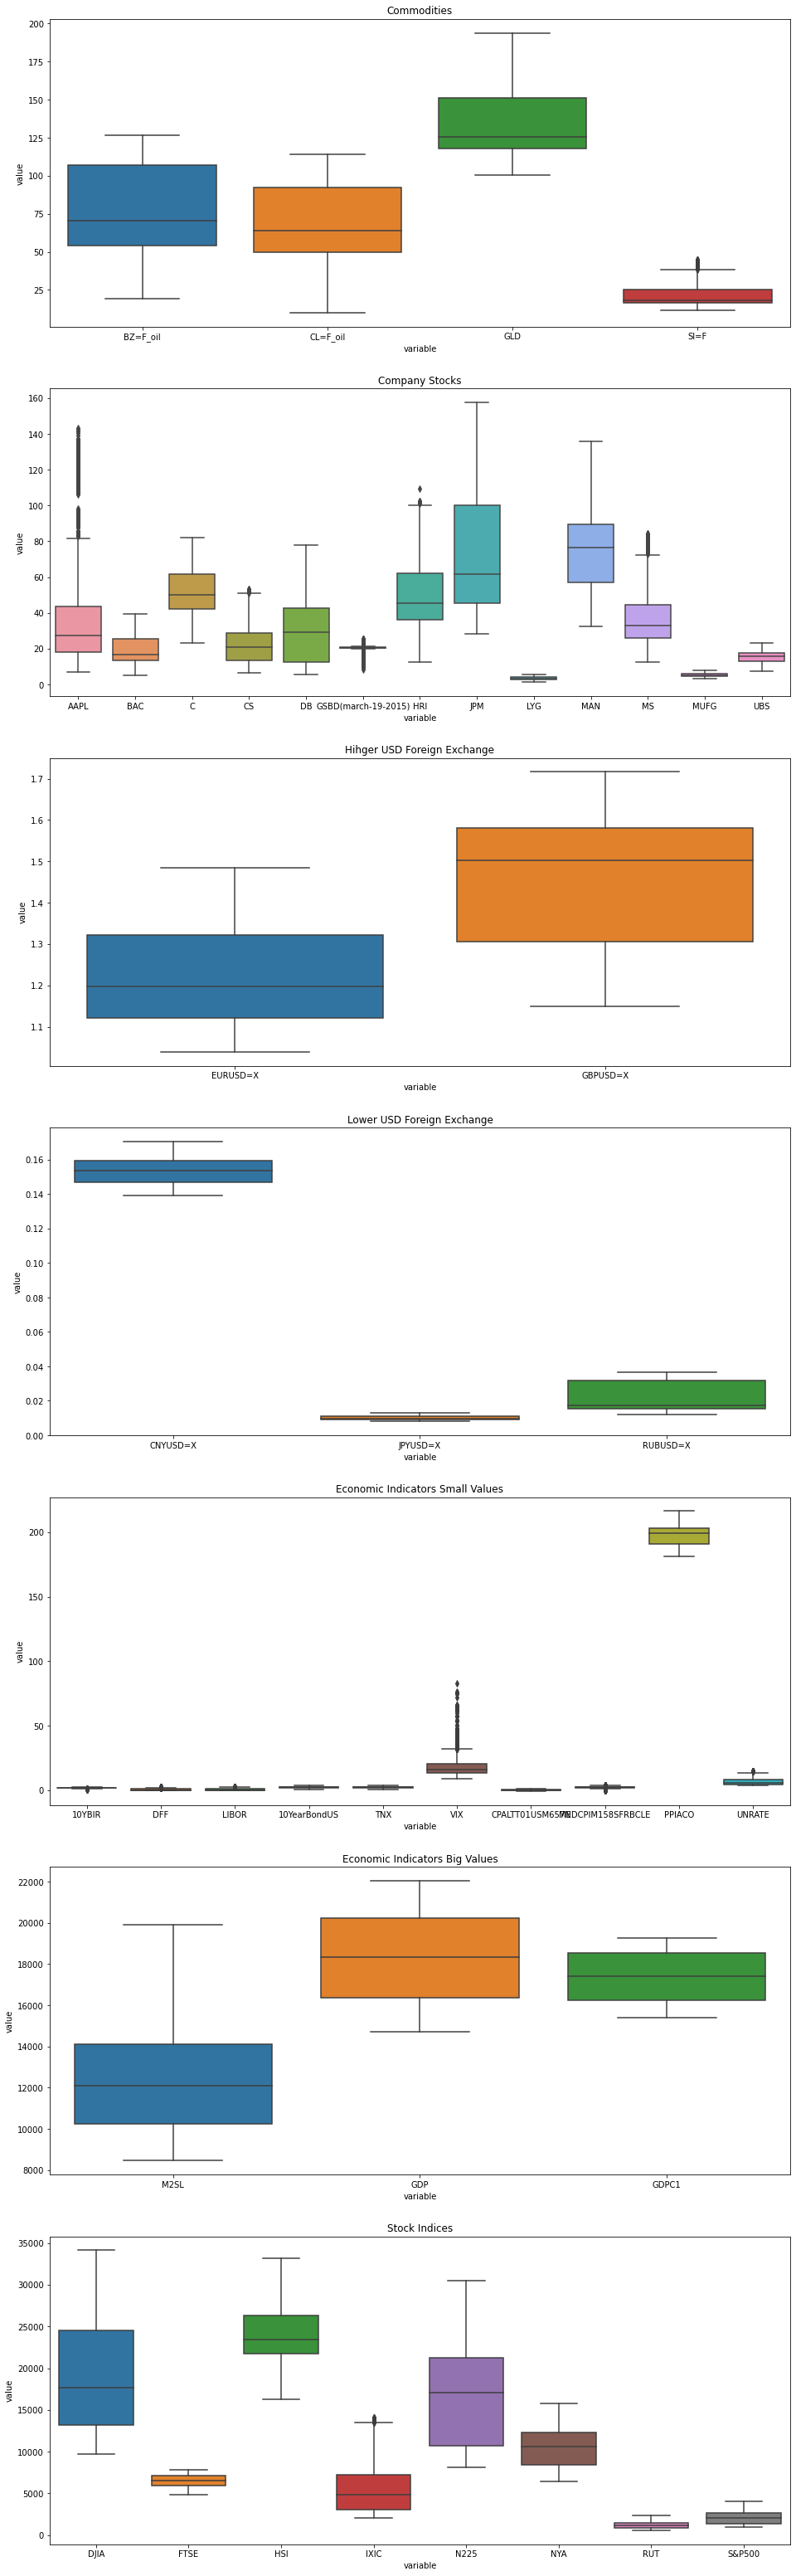

In [21]:
# боксплоти
disp_boxplots(correlation_assets_dict)

### Label encoding

In [22]:
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])

In [23]:
for ind, x in enumerate(le.classes_):
    print(ind, x)

0 negative
1 neutral
2 positive


In [24]:
df['sentiment']

Date
2010-01-04    1
2010-01-05    1
2010-01-06    1
2010-01-07    1
2010-01-08    1
             ..
2021-03-28    0
2021-03-29    1
2021-03-30    1
2021-03-31    0
2021-04-01    0
Name: sentiment, Length: 4106, dtype: int32

### Drop some cols

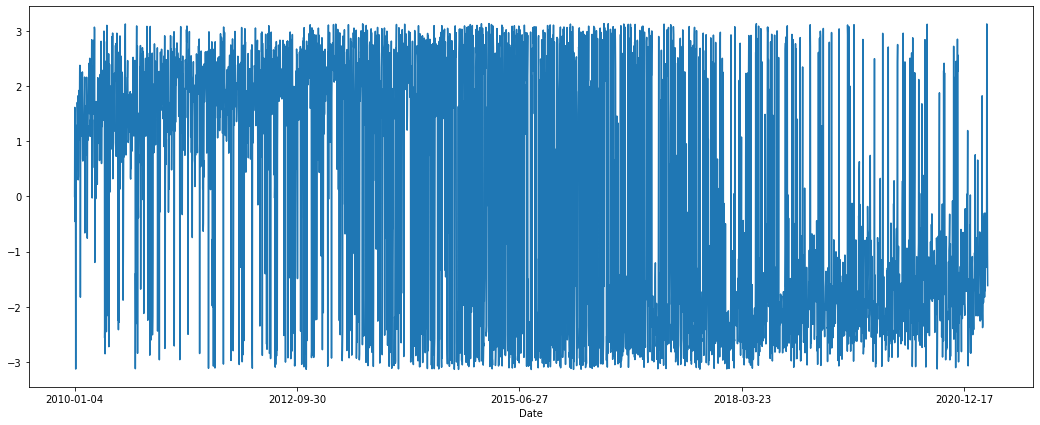

In [245]:
# df['phase'].plot(figsize=(18,7));

In [246]:
# df.drop(columns=['fft3amplitude','fft3phase', 'fft6amplitude', 'fft6phase',
#        'fft9amplitude', 'fft9phase', 'fft20amplitude',
#        'fft20phase', 'fft100amplitude', 'fft100phase', 'phase', 'amplitude'], inplace=True)

### Standartisation

In [247]:
l = list(df.columns)
l.remove('sentiment')
l.remove('maxlogit')


In [248]:
def standartization(df_):
    return (df_ - df_.mean()) / df_.std()

In [249]:
df_stand = df.copy()
df_stand[l] = standartization(df[l])

In [250]:
df_stand

BZ=F_oil  CL=F_oil       GLD      SI=F      AAPL       BAC  \
Date                                                                     
2010-01-04  0.141232  0.534637 -1.140869 -0.546874 -1.008243 -0.422180   
2010-01-05  0.158824  0.545957 -1.145648 -0.496872 -1.007770 -0.357439   
2010-01-06  0.207484  0.607350 -1.059146 -0.440857 -1.012125 -0.333319   
2010-01-07  0.193260  0.584709 -1.092122 -0.415929 -1.012623 -0.264769   
2010-01-08  0.188020  0.588627 -1.065837 -0.397599 -1.010835 -0.283811   
...              ...       ...       ...       ...       ...       ...   
2021-03-28 -0.430584 -0.342566  1.303796  0.541456  3.056972  2.464952   
2021-03-29 -0.425469 -0.334003  1.273051  0.524593  3.059118  2.449296   
2021-03-30 -0.456911 -0.377979  1.142104  0.432799  3.005838  2.535618   
2021-03-31 -0.479369 -0.438501  1.256324  0.490867  3.086294  2.497534   
2021-04-01 -0.477123 -0.338792  1.352862  0.552161  3.116688  2.599090   

                   C        CS        DB  GSBD(march-19-2015)  ...  momentum  \
Date                                                           ...             
2010-01-04 -1.323734  2.705577  2.345220         9.121704e-14  ... -0.274357   
2010-01-05 -1.226289  2.745869  2.421681         9.121704e-14  ... -0.274357   
2010-01-06 -1.143835  2.677466  2.351228         9.121704e-14  ... -0.274357   
2010-01-07 -1.136339  2.873306  2.396558         9.121704e-14  ... -0.274357   
2010-01-08 -1.181314  2.947331  2.542925         9.121704e-14  ... -0.274357   
...              ...       ...       ...                  ...  ...       ...   
2021-03-28  1.529171 -1.025828 -0.962607        -2.599402e-01  ... -1.161805   
2021-03-29  1.493191 -1.073165 -0.970239        -2.971506e-01  ... -1.085421   
2021-03-30  1.596633 -1.111545 -0.961081        -4.813431e-01  ... -0.028018   
2021-03-31  1.580892 -1.148967 -0.967377        -5.873933e-01  ... -0.176875   
2021-04-01  1.610126 -1.139372 -0.960509        -3.697118e-01  ... -0.274910   

            google_trends  inv_fft3  inv_fft6  inv_fft9  inv_fft20  \
Date                                                                 
2010-01-04       1.099505  0.411197  0.640214  1.094824   1.612644   
2010-01-05       0.360199  0.408748  0.636004  1.085065   1.581627   
2010-01-06      -0.009454  0.406291  0.631782  1.075228   1.550306   
2010-01-07       1.395227  0.403827  0.627549  1.065314   1.518696   
2010-01-08       1.025574  0.401356  0.623303  1.055324   1.486809   
...                   ...       ...       ...       ...        ...   
2021-03-28      -0.674829  0.423331  0.661077  1.142421   1.762713   
2021-03-29      -0.025439  0.420919  0.656930  1.133065   1.733412   
2021-03-30       0.024514  0.418500  0.652770  1.123626   1.703742   
2021-03-31      -0.225251  0.416073  0.648597  1.114106   1.673715   
2021-04-01      -0.125345  0.413638  0.644412  1.104505   1.643345   

            inv_fft100  maxlogit  sentiment        GS  
Date                                                   
2010-01-04    1.475394  0.000000          1 -0.187630  
2010-01-05    1.294469  0.000000          1 -0.120841  
2010-01-06    1.114862  0.000000          1 -0.161875  
2010-01-07    0.937823  0.000000          1 -0.087446  
2010-01-08    0.764566  0.000000          1 -0.160784  
...                ...       ...        ...       ...  
2021-03-28    2.355511  1.649274          0  3.156289  
2021-03-29    2.186892  1.362129          1  3.144212  
2021-03-30    2.013362  1.167753          1  3.281283  
2021-03-31    1.836108  0.642788          0  3.171931  
2021-04-01    1.656365  1.590516          0  3.185901  

[4106 rows x 65 columns]

### Stationarisarion

#### Unstandartised

In [253]:
df

BZ=F_oil   CL=F_oil         GLD       SI=F        AAPL  \
Date                                                                  
2010-01-04  80.120003  81.510002  109.800003  17.440001    7.643214   
2010-01-05  80.589996  81.769997  109.699997  17.781000    7.656429   
2010-01-06  81.889999  83.180000  111.510002  18.163000    7.534643   
2010-01-07  81.510002  82.660004  110.820000  18.333000    7.520714   
2010-01-08  81.370003  82.750000  111.370003  18.458000    7.570714   
...               ...        ...         ...        ...         ...   
2021-03-28  64.843335  61.363334  160.953334  24.862000  121.329999   
2021-03-29  64.980003  61.560001  160.309998  24.747000  121.389999   
2021-03-30  64.139999  60.549999  157.570007  24.121000  119.900002   
2021-03-31  63.540001  59.160000  159.960007  24.517000  122.150002   
2021-04-01  63.599998  61.450001  161.979996  24.934999  123.000000   

                  BAC          C         CS         DB  GSBD(march-19-2015)  \
Date                                                                          
2010-01-04  15.690000  34.000000  50.771484  69.875954            20.382376   
2010-01-05  16.200001  35.299999  51.191406  71.211830            20.382376   
2010-01-06  16.389999  36.400002  50.478516  69.980919            20.382376   
2010-01-07  16.930000  36.500000  52.519531  70.772903            20.382376   
2010-01-08  16.780001  35.900002  53.291016  73.330154            20.382376   
...               ...        ...        ...        ...                  ...   
2021-03-28  38.433334  72.060000  11.883333  12.083333            19.916666   
2021-03-29  38.310001  71.580002  11.390000  11.950000            19.850000   
2021-03-30  38.990002  72.959999  10.990000  12.110000            19.520000   
2021-03-31  38.689999  72.750000  10.600000  12.000000            19.330000   
2021-04-01  39.490002  73.139999  10.700000  12.120000            19.719999   

            ...    momentum  google_trends    inv_fft3    inv_fft6  \
Date        ...                                                      
2010-01-04  ...   99.121791          18.13  196.329058  206.848904   
2010-01-05  ...   99.121791          14.43  196.241785  206.683378   
2010-01-06  ...   99.121791          12.58  196.154250  206.517375   
2010-01-07  ...   99.121791          19.61  196.066451  206.350900   
2010-01-08  ...   99.121791          17.76  195.978388  206.183958   
...         ...         ...            ...         ...         ...   
2021-03-28  ...   95.697363           9.25  196.761465  207.669195   
2021-03-29  ...   95.992109          12.50  196.675510  207.506132   
2021-03-30  ...  100.072346          12.75  196.589293  207.342567   
2021-03-31  ...   99.497948          11.50  196.502811  207.178503   
2021-04-01  ...   99.119657          12.00  196.416066  207.013947   

              inv_fft9   inv_fft20  inv_fft100  maxlogit  sentiment  \
Date                                                                  
2010-01-04  227.129638  252.493514  248.891640  0.000000          1   
2010-01-05  226.724462  251.131430  240.649170  0.000000          1   
2010-01-06  226.316058  249.756022  232.466705  0.000000          1   
2010-01-07  225.904467  248.367889  224.401234  0.000000          1   
2010-01-08  225.489733  246.967633  216.508114  0.000000          1   
...                ...         ...         ...       ...        ...   
2021-03-28  229.105668  259.083580  288.987582  1.649274          0   
2021-03-29  228.717243  257.796870  281.305740  1.362129          1   
2021-03-30  228.325388  256.493938  273.400108  1.167753          1   
2021-03-31  227.930142  255.175352  265.324876  0.642788          0   
2021-04-01  227.531545  253.841684  257.136226  1.590516          0   

                    GS  
Date                    
2010-01-04  173.080002  
2010-01-05  176.139999  
2010-01-06  174.259995  
2010-01-07  177.669998  
2010-01-08  174.309998  
...                ...  
2021-03-28  326.283346  
2

In [254]:
80.589996 - 80.120003

0.4699930000000023

In [255]:
check_stat_cols = np.append(df.columns[:-3],  df.columns[-1:])
check_stat_cols

array(['BZ=F_oil', 'CL=F_oil', 'GLD', 'SI=F', 'AAPL', 'BAC', 'C', 'CS',
       'DB', 'GSBD(march-19-2015)', 'HRI', 'JPM', 'LYG', 'MAN', 'MS',
       'MUFG', 'UBS', 'CNYUSD=X', 'EURUSD=X', 'GBPUSD=X', 'JPYUSD=X',
       'RUBUSD=X', 'google_trends_GS', '10YBIR', 'DFF', 'LIBOR',
       '10YearBondUS', 'TNX', 'VIX', 'CPALTT01USM657N', 'M2SL',
       'MEDCPIM158SFRBCLE', 'PPIACO', 'UNRATE', 'GDP', 'GDPC1', 'DJIA',
       'FTSE', 'HSI', 'IXIC', 'N225', 'NYA', 'RUT', 'S&P500', 'MA7',
       'MA21', 'EMA', 'EMA12', 'EMA26', 'MACD', '20STD', 'upper_band',
       'lower_band', 'difference-1', 'ROC7', 'momentum', 'google_trends',
       'inv_fft3', 'inv_fft6', 'inv_fft9', 'inv_fft20', 'inv_fft100',
       'GS'], dtype=object)

In [256]:
def get_adfuller(df, check_stat_cols):
    res = []
    for col in check_stat_cols:
        dftest = adfuller(df[col])
        pval = dftest[1]
        if pval <= 0.05:
            res.append('stationary')
        else:
            res.append('non-stationary')
    adfuller_result_df = pd.DataFrame({'Columns': check_stat_cols, 'Result': res})
    
    return adfuller_result_df

In [257]:
adfuller_result_df = get_adfuller(df, check_stat_cols)
adfuller_result_df

Columns          Result
0     BZ=F_oil  non-stationary
1     CL=F_oil  non-stationary
2          GLD  non-stationary
3         SI=F  non-stationary
4         AAPL  non-stationary
..         ...             ...
58    inv_fft6  non-stationary
59    inv_fft9  non-stationary
60   inv_fft20      stationary
61  inv_fft100      stationary
62          GS  non-stationary

[63 rows x 2 columns]

In [258]:
adfuller_result_df.groupby(['Result']).count()

Columns
Result                 
non-stationary       50
stationary           13

In [259]:
adfuller_result_df[adfuller_result_df['Result'] == 'non-stationary']

Columns          Result
0       BZ=F_oil  non-stationary
1       CL=F_oil  non-stationary
2            GLD  non-stationary
3           SI=F  non-stationary
4           AAPL  non-stationary
5            BAC  non-stationary
6              C  non-stationary
7             CS  non-stationary
8             DB  non-stationary
10           HRI  non-stationary
11           JPM  non-stationary
12           LYG  non-stationary
13           MAN  non-stationary
14            MS  non-stationary
15          MUFG  non-stationary
16           UBS  non-stationary
17      CNYUSD=X  non-stationary
18      EURUSD=X  non-stationary
19      GBPUSD=X  non-stationary
20      JPYUSD=X  non-stationary
21      RUBUSD=X  non-stationary
23        10YBIR  non-stationary
24           DFF  non-stationary
25         LIBOR  non-stationary
26  10YearBondUS  non-stationary
27           TNX  non-stationary
30          M2SL  non-stationary
32        PPIACO  non-stationary
33        UNRATE  non-stationary
34           GDP  non-stationary
35         GDPC1  non-stationary
36          DJIA  non-stationary
37          FTSE  non-stationary
38           HSI  non-stationary
39          IXIC  non-stationary
40          N225  non-stationary
41           NYA  non-stationary
42           RUT  non-stationary
43        S&P500  non-stationary
44           MA7  non-stationary
45          MA21  non-stationary
46           EMA  non-stationary
47         EMA12  non-stationary
48         EMA26  non-stationary
51    upper_band  non-stationary
52    lower_band  non-stationary
53  difference-1  non-stationary
58      inv_fft6  non-stationary
59      inv_fft9  non-stationary
62            GS  non-stationary

In [260]:
adfuller_result_df[adfuller_result_df['Result'] == 'stationary']

Columns      Result
9   GSBD(march-19-2015)  stationary
22     google_trends_GS  stationary
28                  VIX  stationary
29      CPALTT01USM657N  stationary
31    MEDCPIM158SFRBCLE  stationary
49                 MACD  stationary
50                20STD  stationary
54                 ROC7  stationary
55             momentum  stationary
56        google_trends  stationary
57             inv_fft3  stationary
60            inv_fft20  stationary
61           inv_fft100  stationary

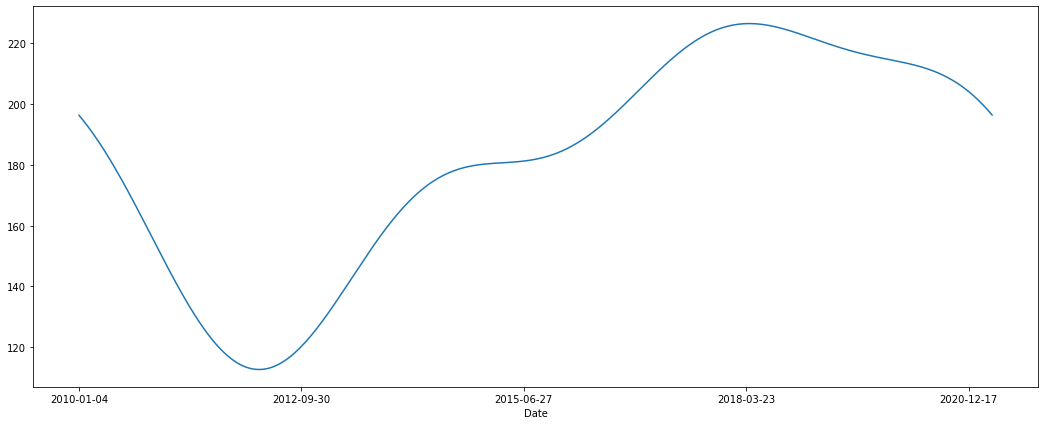

In [154]:
df['inv_fft3'].plot(figsize=(18,7));

In [84]:
nonstat_cols = adfuller_result_df[adfuller_result_df['Result'] == 'non-stationary']['Columns'].tolist()

In [ ]:
def get_stationarisation(df, columns):
    

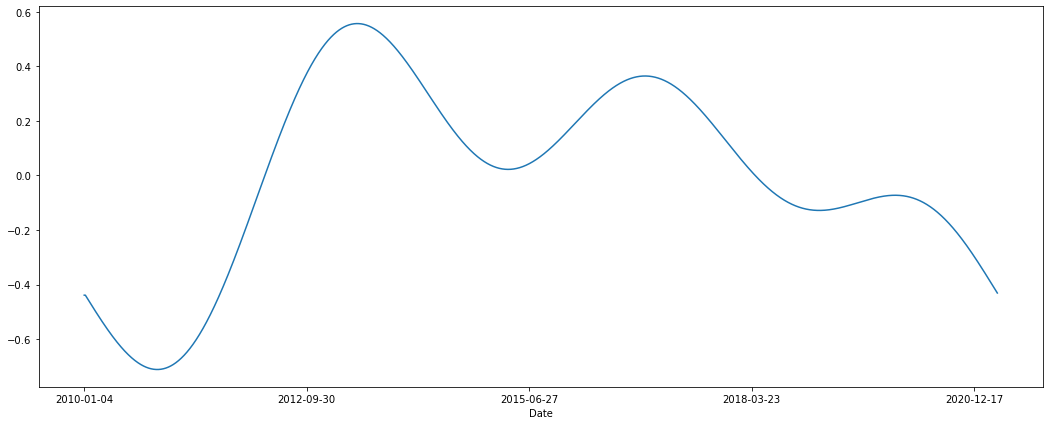

In [175]:
df['inv_fft3'].diff(5).fillna(method='bfill').plot(figsize=(18,7));

In [170]:
adfuller(df['inv_fft3'].diff(5).fillna(method='bfill'))

(-83.64763401204917,
 0.0,
 8,
 4097,
 {'1%': -3.43194712030181,
  '5%': -2.8622457202402996,
  '10%': -2.56714566161182},
 -200664.77762273568)

#### Standartised

In [328]:
df_stand

BZ=F_oil  CL=F_oil       GLD      SI=F      AAPL       BAC  \
Date                                                                     
2010-01-04  0.141232  0.534637 -1.140869 -0.546874 -1.008243 -0.422180   
2010-01-05  0.158824  0.545957 -1.145648 -0.496872 -1.007770 -0.357439   
2010-01-06  0.207484  0.607350 -1.059146 -0.440857 -1.012125 -0.333319   
2010-01-07  0.193260  0.584709 -1.092122 -0.415929 -1.012623 -0.264769   
2010-01-08  0.188020  0.588627 -1.065837 -0.397599 -1.010835 -0.283811   
...              ...       ...       ...       ...       ...       ...   
2021-03-28 -0.430584 -0.342566  1.303796  0.541456  3.056972  2.464952   
2021-03-29 -0.425469 -0.334003  1.273051  0.524593  3.059118  2.449296   
2021-03-30 -0.456911 -0.377979  1.142104  0.432799  3.005838  2.535618   
2021-03-31 -0.479369 -0.438501  1.256324  0.490867  3.086294  2.497534   
2021-04-01 -0.477123 -0.338792  1.352862  0.552161  3.116688  2.599090   

                   C        CS        DB  GSBD(march-19-2015)  ...  momentum  \
Date                                                           ...             
2010-01-04 -1.323734  2.705577  2.345220         9.121704e-14  ... -0.274357   
2010-01-05 -1.226289  2.745869  2.421681         9.121704e-14  ... -0.274357   
2010-01-06 -1.143835  2.677466  2.351228         9.121704e-14  ... -0.274357   
2010-01-07 -1.136339  2.873306  2.396558         9.121704e-14  ... -0.274357   
2010-01-08 -1.181314  2.947331  2.542925         9.121704e-14  ... -0.274357   
...              ...       ...       ...                  ...  ...       ...   
2021-03-28  1.529171 -1.025828 -0.962607        -2.599402e-01  ... -1.161805   
2021-03-29  1.493191 -1.073165 -0.970239        -2.971506e-01  ... -1.085421   
2021-03-30  1.596633 -1.111545 -0.961081        -4.813431e-01  ... -0.028018   
2021-03-31  1.580892 -1.148967 -0.967377        -5.873933e-01  ... -0.176875   
2021-04-01  1.610126 -1.139372 -0.960509        -3.697118e-01  ... -0.274910   

            google_trends  inv_fft3  inv_fft6  inv_fft9  inv_fft20  \
Date                                                                 
2010-01-04       1.099505  0.411197  0.640214  1.094824   1.612644   
2010-01-05       0.360199  0.408748  0.636004  1.085065   1.581627   
2010-01-06      -0.009454  0.406291  0.631782  1.075228   1.550306   
2010-01-07       1.395227  0.403827  0.627549  1.065314   1.518696   
2010-01-08       1.025574  0.401356  0.623303  1.055324   1.486809   
...                   ...       ...       ...       ...        ...   
2021-03-28      -0.674829  0.423331  0.661077  1.142421   1.762713   
2021-03-29      -0.025439  0.420919  0.656930  1.133065   1.733412   
2021-03-30       0.024514  0.418500  0.652770  1.123626   1.703742   
2021-03-31      -0.225251  0.416073  0.648597  1.114106   1.673715   
2021-04-01      -0.125345  0.413638  0.644412  1.104505   1.643345   

            inv_fft100  maxlogit  sentiment        GS  
Date                                                   
2010-01-04    1.475394  0.000000          1 -0.187630  
2010-01-05    1.294469  0.000000          1 -0.120841  
2010-01-06    1.114862  0.000000          1 -0.161875  
2010-01-07    0.937823  0.000000          1 -0.087446  
2010-01-08    0.764566  0.000000          1 -0.160784  
...                ...       ...        ...       ...  
2021-03-28    2.355511  1.649274          0  3.156289  
2021-03-29    2.186892  1.362129          1  3.144212  
2021-03-30    2.013362  1.167753          1  3.281283  
2021-03-31    1.836108  0.642788          0  3.171931  
2021-04-01    1.656365  1.590516          0  3.185901  

[4106 rows x 65 columns]

In [329]:
adfuller_result_df_stand = get_adfuller(df_stand, check_stat_cols)
adfuller_result_df_stand

Columns          Result
0     BZ=F_oil  non-stationary
1     CL=F_oil  non-stationary
2          GLD  non-stationary
3         SI=F  non-stationary
4         AAPL  non-stationary
..         ...             ...
58    inv_fft6  non-stationary
59    inv_fft9  non-stationary
60   inv_fft20      stationary
61  inv_fft100      stationary
62          GS  non-stationary

[63 rows x 2 columns]

In [330]:
adfuller_result_df_stand.groupby(['Result']).count()

Columns
Result                 
non-stationary       50
stationary           13

In [334]:
adfuller_result_df_stand[adfuller_result_df_stand['Result'] == 'stationary']['Columns'].to_numpy()

array(['GSBD(march-19-2015)', 'google_trends_GS', 'VIX',
       'CPALTT01USM657N', 'MEDCPIM158SFRBCLE', 'MACD', '20STD', 'ROC7',
       'momentum', 'google_trends', 'inv_fft3', 'inv_fft20', 'inv_fft100'],
      dtype=object)

In [335]:
adfuller_result_df_stand[adfuller_result_df_stand['Result'] == 'non-stationary']['Columns'].to_numpy()

array(['BZ=F_oil', 'CL=F_oil', 'GLD', 'SI=F', 'AAPL', 'BAC', 'C', 'CS',
       'DB', 'HRI', 'JPM', 'LYG', 'MAN', 'MS', 'MUFG', 'UBS', 'CNYUSD=X',
       'EURUSD=X', 'GBPUSD=X', 'JPYUSD=X', 'RUBUSD=X', '10YBIR', 'DFF',
       'LIBOR', '10YearBondUS', 'TNX', 'M2SL', 'PPIACO', 'UNRATE', 'GDP',
       'GDPC1', 'DJIA', 'FTSE', 'HSI', 'IXIC', 'N225', 'NYA', 'RUT',
       'S&P500', 'MA7', 'MA21', 'EMA', 'EMA12', 'EMA26', 'upper_band',
       'lower_band', 'difference-1', 'inv_fft6', 'inv_fft9', 'GS'],
      dtype=object)

In [336]:
cols_for_satationarization = ['BZ=F_oil', 'CL=F_oil', 'GLD', 'SI=F', 'AAPL', 'BAC', 'C', 'CS',
       'DB', 'HRI', 'JPM', 'LYG', 'MAN', 'MS', 'MUFG', 'UBS', 'CNYUSD=X',
       'EURUSD=X', 'GBPUSD=X', 'JPYUSD=X', 'RUBUSD=X', '10YBIR', 'DFF',
       'LIBOR', '10YearBondUS', 'TNX', 'M2SL', 'PPIACO', 'UNRATE', 'GDP',
       'GDPC1', 'DJIA', 'FTSE', 'HSI', 'IXIC', 'N225', 'NYA', 'RUT',
       'S&P500', 'MA7', 'MA21', 'EMA', 'EMA12', 'EMA26', 'upper_band',
       'lower_band', 'difference-1', 'inv_fft6', 'inv_fft9', 'GS', 'GSBD(march-19-2015)', 'google_trends_GS', 'VIX',
       'CPALTT01USM657N', 'MEDCPIM158SFRBCLE', 'google_trends', 'inv_fft3', 'inv_fft20', 'inv_fft100']

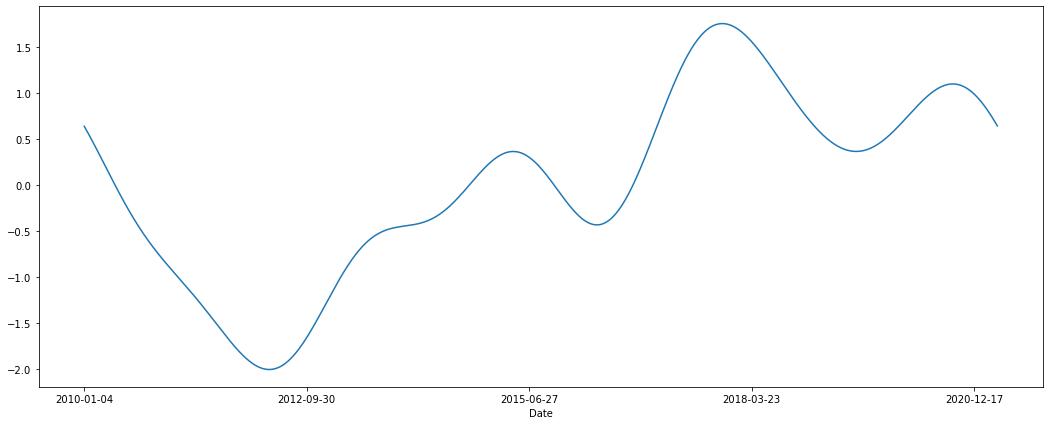

In [186]:
df_stand['inv_fft6'].plot(figsize=(18,7));

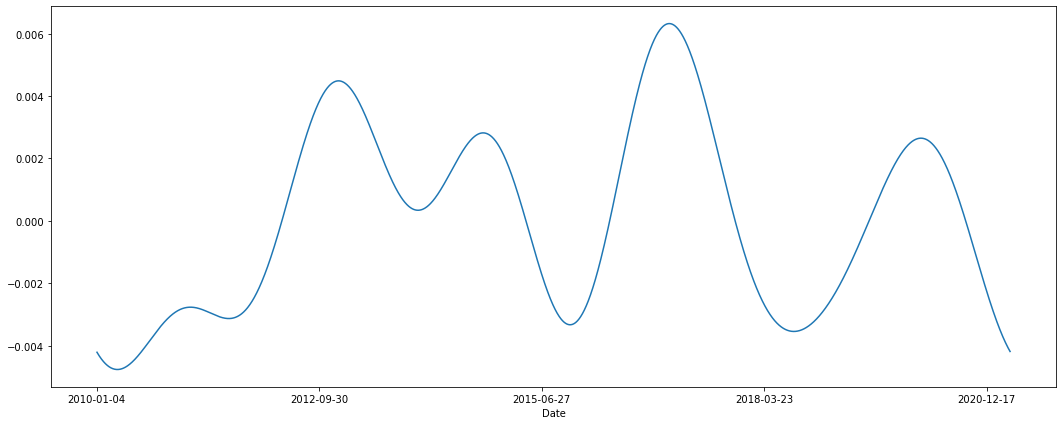

In [187]:
df_stand['inv_fft6'].diff().plot(figsize=(18,7));

In [188]:
adfuller(df_stand['inv_fft6'].diff().fillna(method='bfill'))

(-61.821714445082094,
 0.0,
 4,
 4101,
 {'1%': -3.431945561538905,
  '5%': -2.862245031653711,
  '10%': -2.567145295038988},
 -238426.03610034712)

In [337]:
df_stand_stat = df_stand.copy()
df_stand_stat[cols_for_satationarization] = df_stand_stat[cols_for_satationarization].diff()

In [338]:
# df_stand_stat.fillna(method='bfill', inplace=True)
df_stand_stat = df_stand_stat.iloc[10:-10]

In [339]:
df_stand_stat

BZ=F_oil  CL=F_oil       GLD      SI=F      AAPL       BAC  \
Date                                                                     
2010-01-14 -0.018341 -0.011321  0.023417  0.015397 -0.001558  0.025389   
2010-01-15 -0.026576 -0.060522 -0.055915 -0.034020 -0.004470 -0.071089   
2010-01-16  0.004866  0.011103  0.007885  0.013674  0.002909  0.001904   
2010-01-17  0.004866  0.011103  0.007885  0.013674  0.002909  0.001904   
2010-01-18  0.004866  0.011103  0.007885  0.013674  0.002909  0.001904   
...              ...       ...       ...       ...       ...       ...   
2021-03-18 -0.176673 -0.200288 -0.045401  0.042671 -0.151257  0.125674   
2021-03-19  0.046788  0.061828  0.032498 -0.004252 -0.019309 -0.052047   
2021-03-20  0.001123  0.001887 -0.003823 -0.026932  0.040526 -0.036814   
2021-03-21  0.001123  0.001887 -0.003823 -0.026932  0.040526 -0.036814   
2021-03-22  0.001123  0.001887 -0.003823 -0.026932  0.040526 -0.036814   

                   C        CS        DB  GSBD(march-19-2015)  ...  momentum  \
Date                                                           ...             
2010-01-14  0.007496  0.003748 -0.021846             0.000000  ... -1.379942   
2010-01-15 -0.067462 -0.255810 -0.194974             0.000000  ... -1.399692   
2010-01-16  0.022487  0.008433  0.013517             0.000000  ... -1.208188   
2010-01-17  0.022487  0.008433  0.013517             0.000000  ... -1.014649   
2010-01-18  0.022487  0.008433  0.013517             0.000000  ... -0.819042   
...              ...       ...       ...                  ...  ...       ...   
2021-03-18  0.017990 -0.006717  0.019460            -0.150703  ...  0.400177   
2021-03-19 -0.062215  0.001919 -0.016026             0.156285  ... -0.389271   
2021-03-20 -0.026235  0.002239 -0.000954             0.027908  ... -0.442570   
2021-03-21 -0.026235  0.002239 -0.000954             0.027908  ... -0.496152   
2021-03-22 -0.026235  0.002239 -0.000954             0.027908  ... -0.550019   

            google_trends  inv_fft3  inv_fft6  inv_fft9  inv_fft20  \
Date                                                                 
2010-01-14      -0.813236 -0.002516 -0.004314 -0.010422  -0.033249   
2010-01-15      -0.887167 -0.002523 -0.004325 -0.010491  -0.033427   
2010-01-16       1.108958 -0.002530 -0.004336 -0.010558  -0.033590   
2010-01-17      -2.365778 -0.002538 -0.004347 -0.010624  -0.033739   
2010-01-18       0.517514 -0.002545 -0.004357 -0.010689  -0.033873   
...                   ...       ...       ...       ...        ...   
2021-03-18       1.049015 -0.002331 -0.003998 -0.008387  -0.024440   
2021-03-19       1.998123 -0.002338 -0.004012 -0.008479  -0.024939   
2021-03-20      -3.196997 -0.002345 -0.004026 -0.008571  -0.025427   
2021-03-21      -0.099906 -0.002353 -0.004040 -0.008662  -0.025903   
2021-03-22       0.499531 -0.002360 -0.004054 -0.008752  -0.026369   

            inv_fft100  maxlogit  sentiment        GS  
Date                                                   
2010-01-14   -0.128884  0.000000          1 -0.011787  
2010-01-15   -0.118777  0.000000          1 -0.072464  
2010-01-16   -0.108210  0.000000          1  0.009003  
2010-01-17   -0.097314  0.000000          1  0.009003  
2010-01-18   -0.086220  0.000000          1  0.009003  
...                ...       ...        ...       ...  
2021-03-18   -0.060638  1.626257          0  0.066571  
2021-03-19   -0.072516  0.331648          1 -0.082941  
2021-03-20   -0.084347  0.000000          1 -0.035432  
2021-03-21   -0.096007  1.816558          0 -0.035432  
2021-03-22   -0.107369 -0.010036          1 -0.035432  

[4086 rows x 65 columns]

In [340]:
adfuller_result_df_stand_stat = get_adfuller(df_stand_stat, check_stat_cols)
adfuller_result_df_stand_stat

Columns          Result
0     BZ=F_oil      stationary
1     CL=F_oil      stationary
2          GLD      stationary
3         SI=F      stationary
4         AAPL      stationary
..         ...             ...
58    inv_fft6  non-stationary
59    inv_fft9  non-stationary
60   inv_fft20      stationary
61  inv_fft100      stationary
62          GS      stationary

[63 rows x 2 columns]

In [341]:
adfuller_result_df_stand_stat.groupby(['Result']).count()

Columns
Result                 
non-stationary        3
stationary           60

In [342]:
adfuller_result_df_stand_stat[adfuller_result_df_stand_stat['Result'] == 'non-stationary']['Columns'].tolist()

['inv_fft3', 'inv_fft6', 'inv_fft9']

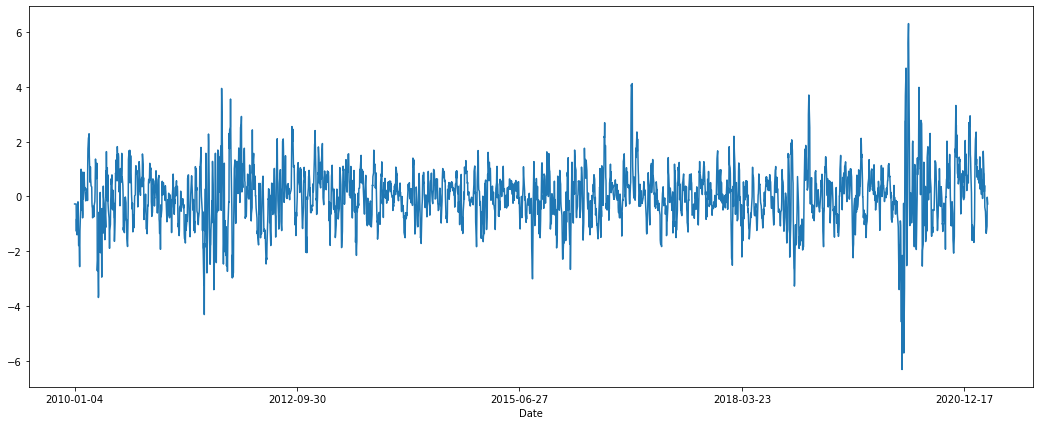

In [351]:
df_stand['ROC7'].iloc[:].plot(figsize=(18,7));

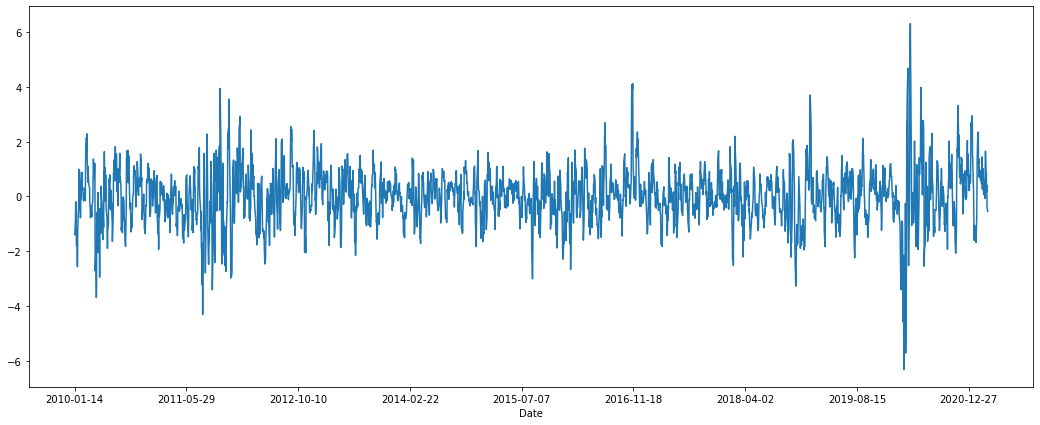

In [352]:
df_stand_stat['ROC7'].iloc[:].plot(figsize=(18,7));

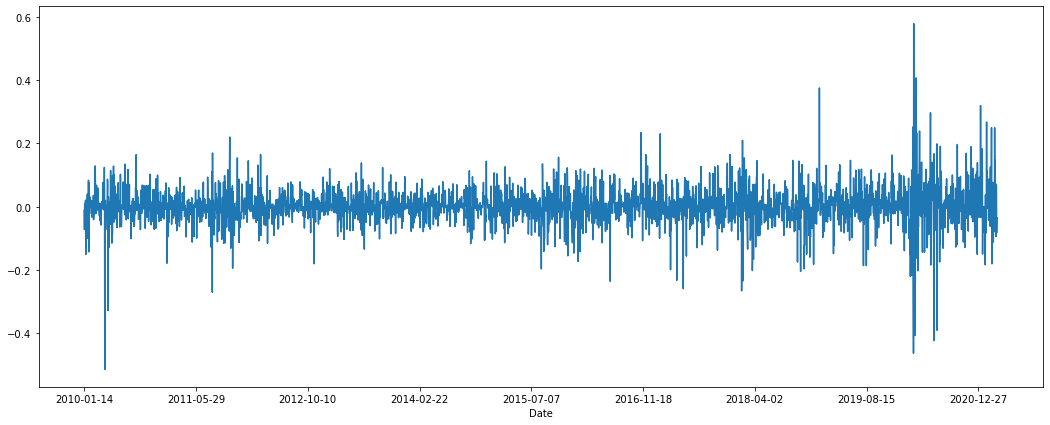

In [344]:
df_stand_stat['GS'].iloc[:].plot(figsize=(18,7));

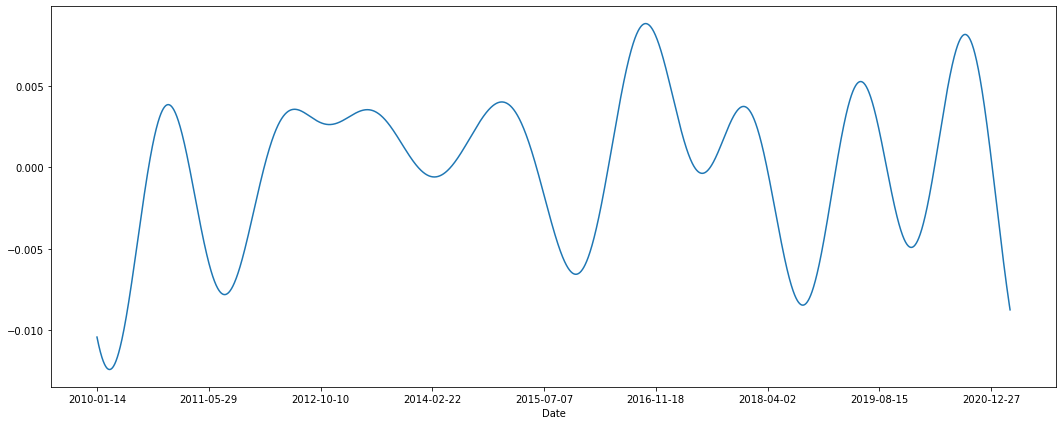

In [345]:
df_stand_stat['inv_fft9'].plot(figsize=(18,7));

In [346]:
adfuller(df_stand_stat['inv_fft9'])

(-0.2373087319193097,
 0.9339259298071478,
 4,
 4081,
 {'1%': -3.4319533859291815,
  '5%': -2.862248488089919,
  '10%': -2.567147135092303},
 -228346.4802341463)

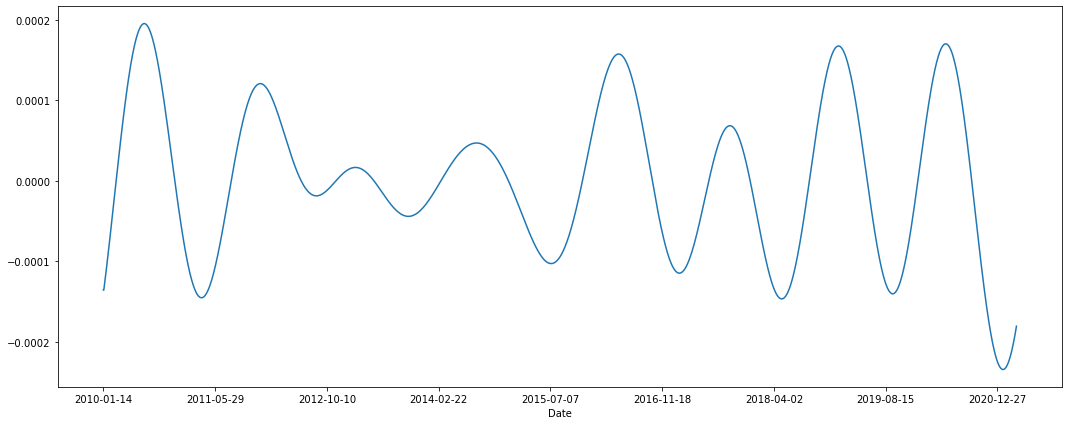

In [347]:
df_stand_stat['inv_fft9'].diff(2).fillna(method='bfill').plot(figsize=(18,7));

In [348]:
# df_stand_stat.to_csv(r'C:\Users\adima\Desktop\thesis\data_overview\data\ready_data_stand&stat.csv')

### Statistical tests

In [103]:
df_stand = pd.read_csv(r'C:\Users\adima\Desktop\thesis\data_overview\data\ready_data_stand.csv', index_col='Date')

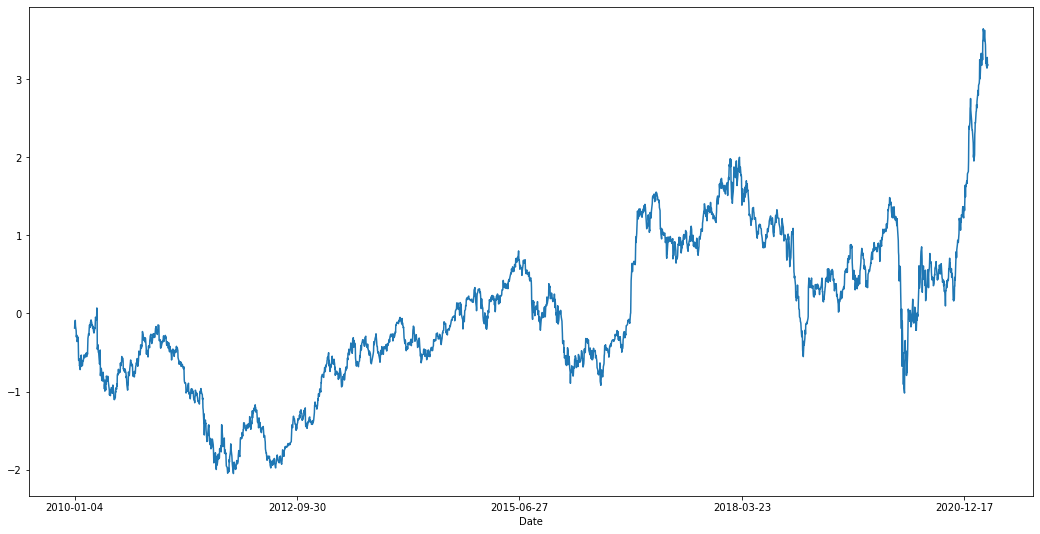

In [104]:
df_stand['GS'].plot(figsize=(18,9));

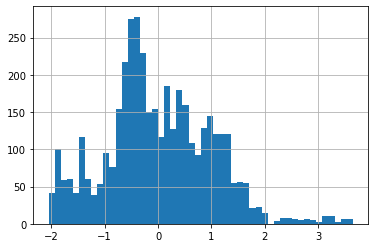

In [105]:
df_stand['GS'].hist(bins=50);

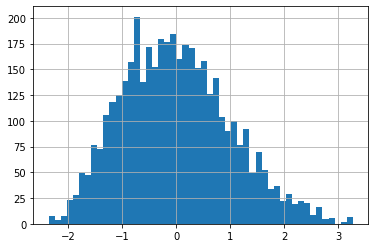

In [106]:
df_stand['google_trends'].hist(bins=50);

In [108]:
shapiro(df_stand['google_trends'])

ShapiroResult(statistic=0.9886983633041382, pvalue=1.2988385842404578e-17)

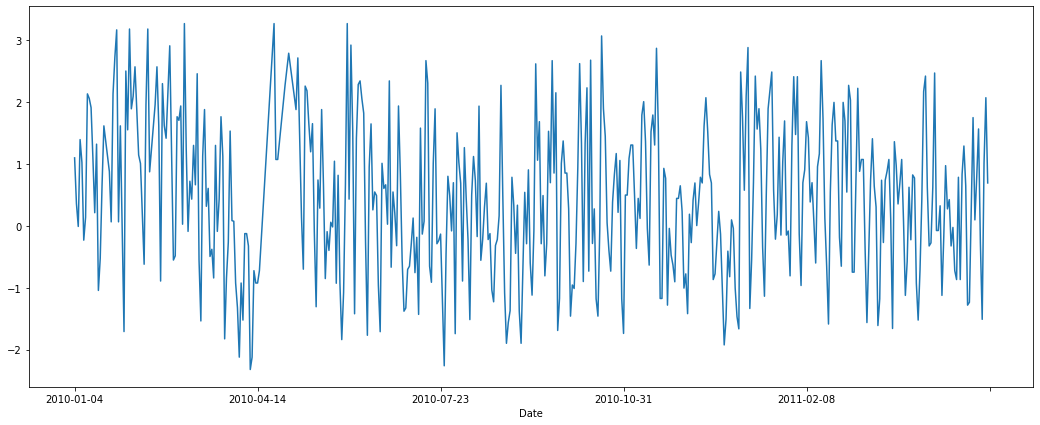

In [111]:
df_stand['google_trends'].iloc[:500].plot(figsize=(18,7));

In [80]:
df_stand['google_trends'].isna().sum()

25

In [250]:
df_test = df.copy()

In [251]:
corr = df_test.corr()

In [252]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df_test.columns[columns]
df_test_corr = df_test[selected_columns]

In [253]:
df_test_corr.shape

(4106, 41)

In [254]:
df_test_corr.columns

Index(['BZ=F_oil', 'GLD', 'SI=F', 'AAPL', 'BAC', 'CS', 'GSBD(march-19-2015)',
       'HRI', 'LYG', 'MAN', 'MUFG', 'UBS', 'CNYUSD=X', 'EURUSD=X', 'GBPUSD=X',
       'JPYUSD=X', 'RUBUSD=X', 'google_trends_GS', '10YBIR', 'DFF',
       '10YearBondUS', 'VIX', 'CPALTT01USM657N', 'MEDCPIM158SFRBCLE', 'PPIACO',
       'UNRATE', 'FTSE', 'HSI', 'MACD', '20STD', 'ROC7', 'google_trends',
       'amplitude', 'phase', 'inv_fft3', 'fft3phase', 'fft6phase',
       'fft20phase', 'fft100phase', 'maxlogit', 'sentiment'],
      dtype='object')

In [255]:
selected_columns = selected_columns[:-1].values

In [259]:

from statsmodels.api import OLS

def backwardElimination(x, Y, sl, columns_):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                print(j)
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns_ = np.delete(columns_, j)
                    
    regressor_OLS.summary()
    return x, columns_
SL = 0.05
data_modeled, selected_columns = backwardElimination(df_test.iloc[:,:-1].values, df_test.iloc[:,-1:].values, SL, selected_columns)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56


IndexError: index 56 is out of bounds for axis 0 with size 40

In [224]:
numVars = len(df_test.iloc[:,:-1].values[0])
numVars

76

In [229]:
a = df_test.iloc[:,:-1].values

In [230]:
b = a.copy()

In [231]:
b

array([[ 8.01200030e+01,  8.15100020e+01,  1.09800003e+02, ...,
         2.02124132e-17,  0.00000000e+00,  1.00000000e+00],
       [ 8.05899960e+01,  8.17699970e+01,  1.09699997e+02, ...,
         1.61778385e+00,  0.00000000e+00,  1.00000000e+00],
       [ 8.18899990e+01,  8.31800000e+01,  1.11510002e+02, ...,
         1.01309342e+00,  0.00000000e+00,  1.00000000e+00],
       ...,
       [ 6.41399990e+01,  6.05499990e+01,  1.57570007e+02, ...,
         4.59090234e-01,  1.16775286e+00,  1.00000000e+00],
       [ 6.35400010e+01,  5.91600000e+01,  1.59960007e+02, ...,
        -1.01309342e+00,  6.42788410e-01,  0.00000000e+00],
       [ 6.35999980e+01,  6.14500010e+01,  1.61979996e+02, ...,
        -1.61778385e+00,  1.59051645e+00,  0.00000000e+00]])

In [258]:
df_test.iloc[:,-1:].values

array([[173.080002],
       [176.139999],
       [174.259995],
       ...,
       [332.01001 ],
       [327.      ],
       [327.640015]])

In [222]:
selected_columns = df_test.columns
selected_columns = selected_columns[:-1].values
selected_columns

array(['BZ=F_oil', 'CL=F_oil', 'GLD', 'SI=F', 'AAPL', 'BAC', 'C', 'CS',
       'DB', 'GSBD(march-19-2015)', 'HRI', 'JPM', 'LYG', 'MAN', 'MS',
       'MUFG', 'UBS', 'CNYUSD=X', 'EURUSD=X', 'GBPUSD=X', 'JPYUSD=X',
       'RUBUSD=X', 'google_trends_GS', '10YBIR', 'DFF', 'LIBOR',
       '10YearBondUS', 'TNX', 'VIX', 'CPALTT01USM657N', 'M2SL',
       'MEDCPIM158SFRBCLE', 'PPIACO', 'UNRATE', 'GDP', 'GDPC1', 'DJIA',
       'FTSE', 'HSI', 'IXIC', 'N225', 'NYA', 'RUT', 'S&P500', 'MA7',
       'MA21', 'EMA', 'EMA12', 'EMA26', 'MACD', '20STD', 'upper_band',
       'lower_band', 'difference-1', 'ROC7', 'momentum', 'google_trends',
       'amplitude', 'phase', 'inv_fft3', 'fft3amplitude', 'fft3phase',
       'inv_fft6', 'fft6amplitude', 'fft6phase', 'inv_fft9',
       'fft9amplitude', 'fft9phase', 'inv_fft20', 'fft20amplitude',
       'fft20phase', 'inv_fft100', 'fft100amplitude', 'fft100phase',
       'maxlogit', 'sentiment'], dtype=object)

In [119]:
'+'.join(df_stand.columns[:-1])

'BZ=F_oil+CL=F_oil+GLD+SI=F+AAPL+BAC+C+CS+DB+GSBD(march-19-2015)+HRI+JPM+LYG+MAN+MS+MUFG+UBS+CNYUSD=X+EURUSD=X+GBPUSD=X+JPYUSD=X+RUBUSD=X+google_trends_GS+10YBIR+DFF+LIBOR+10YearBondUS+TNX+VIX+CPALTT01USM657N+M2SL+MEDCPIM158SFRBCLE+PPIACO+UNRATE+GDP+GDPC1+DJIA+FTSE+HSI+IXIC+N225+NYA+RUT+S&P500+MA7+MA21+EMA+EMA12+EMA26+MACD+20STD+upper_band+lower_band+difference-1+ROC7+momentum+google_trends+amplitude+phase+inv_fft3+fft3amplitude+fft3phase+inv_fft6+fft6amplitude+fft6phase+inv_fft9+fft9amplitude+fft9phase+inv_fft20+fft20amplitude+fft20phase+inv_fft100+fft100amplitude+fft100phase+maxlogit+sentiment'

In [116]:
cols_for_regr = '+'.join(df_stand.columns[:-1])

In [120]:
cols_for_regr

'BZ=F_oil+CL=F_oil+GLD+SI=F+AAPL+BAC+C+CS+DB+GSBD(march-19-2015)+HRI+JPM+LYG+MAN+MS+MUFG+UBS+CNYUSD=X+EURUSD=X+GBPUSD=X+JPYUSD=X+RUBUSD=X+google_trends_GS+10YBIR+DFF+LIBOR+10YearBondUS+TNX+VIX+CPALTT01USM657N+M2SL+MEDCPIM158SFRBCLE+PPIACO+UNRATE+GDP+GDPC1+DJIA+FTSE+HSI+IXIC+N225+NYA+RUT+S&P500+MA7+MA21+EMA+EMA12+EMA26+MACD+20STD+upper_band+lower_band+difference-1+ROC7+momentum+google_trends+amplitude+phase+inv_fft3+fft3amplitude+fft3phase+inv_fft6+fft6amplitude+fft6phase+inv_fft9+fft9amplitude+fft9phase+inv_fft20+fft20amplitude+fft20phase+inv_fft100+fft100amplitude+fft100phase+maxlogit+sentiment'

In [166]:
cols_for_regr = '+'.join(list(map('Q("{}")'.format, df_stand.columns[:-1])))
cols_for_regr

'Q("BZ=F_oil")+Q("CL=F_oil")+Q("GLD")+Q("SI=F")+Q("AAPL")+Q("BAC")+Q("C")+Q("CS")+Q("DB")+Q("GSBD(march-19-2015)")+Q("HRI")+Q("JPM")+Q("LYG")+Q("MAN")+Q("MS")+Q("MUFG")+Q("UBS")+Q("CNYUSD=X")+Q("EURUSD=X")+Q("GBPUSD=X")+Q("JPYUSD=X")+Q("RUBUSD=X")+Q("google_trends_GS")+Q("10YBIR")+Q("DFF")+Q("LIBOR")+Q("10YearBondUS")+Q("TNX")+Q("VIX")+Q("CPALTT01USM657N")+Q("M2SL")+Q("MEDCPIM158SFRBCLE")+Q("PPIACO")+Q("UNRATE")+Q("GDP")+Q("GDPC1")+Q("DJIA")+Q("FTSE")+Q("HSI")+Q("IXIC")+Q("N225")+Q("NYA")+Q("RUT")+Q("S&P500")+Q("MA7")+Q("MA21")+Q("EMA")+Q("EMA12")+Q("EMA26")+Q("MACD")+Q("20STD")+Q("upper_band")+Q("lower_band")+Q("difference-1")+Q("ROC7")+Q("momentum")+Q("google_trends")+Q("amplitude")+Q("phase")+Q("inv_fft3")+Q("fft3amplitude")+Q("fft3phase")+Q("inv_fft6")+Q("fft6amplitude")+Q("fft6phase")+Q("inv_fft9")+Q("fft9amplitude")+Q("fft9phase")+Q("inv_fft20")+Q("fft20amplitude")+Q("fft20phase")+Q("inv_fft100")+Q("fft100amplitude")+Q("fft100phase")+Q("maxlogit")+Q("sentiment")'

In [179]:
df_test = df.copy()


In [180]:
df_test['GS']

Date
2010-01-04    173.080002
2010-01-05    176.139999
2010-01-06    174.259995
2010-01-07    177.669998
2010-01-08    174.309998
                 ...    
2021-03-28    326.283346
2021-03-29    325.730011
2021-03-30    332.010010
2021-03-31    327.000000
2021-04-01    327.640015
Name: GS, Length: 4106, dtype: float64

In [181]:
%%time
fit = smf.ols('GS ~ ' + cols_for_regr, data=df_stand).fit()

Wall time: 264 ms


In [182]:
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                     GS   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.121e+30
Date:                Sun, 23 May 2021   Prob (F-statistic):               0.00
Time:                        20:33:41   Log-Likelihood:             1.2930e+05
No. Observations:                4106   AIC:                        -2.584e+05
Df Residuals:                    4032   BIC:                        -2.580e+05
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [183]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(fit.resid, fit.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 3929.7104370365673),
 ('p-value', 0.0),
 ('f-value', 1231.2085210002713),
 ('f p-value', 0.0)]

In [184]:
df_test['GS'] = np.log(df_test['GS'])

In [185]:
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(fit.resid, fit.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 3929.7104370365673),
 ('p-value', 0.0),
 ('f-value', 1231.2085210002713),
 ('f p-value', 0.0)]

In [186]:
df_test['GS']

Date
2010-01-04    5.153754
2010-01-05    5.171279
2010-01-06    5.160548
2010-01-07    5.179928
2010-01-08    5.160835
                ...   
2021-03-28    5.787766
2021-03-29    5.786069
2021-03-30    5.805165
2021-03-31    5.789960
2021-04-01    5.791915
Name: GS, Length: 4106, dtype: float64

In [187]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [188]:
X = df_test[df_test.columns[:-1]]
y = df_test['GS']
X.shape



(4106, 76)

In [189]:
y.shape

(4106,)

In [141]:
!pip install patsy

In [122]:
df_stand.columns

Index(['BZ=F_oil', 'CL=F_oil', 'GLD', 'SI=F', 'AAPL', 'BAC', 'C', 'CS', 'DB',
       'GSBD(march-19-2015)', 'HRI', 'JPM', 'LYG', 'MAN', 'MS', 'MUFG', 'UBS',
       'CNYUSD=X', 'EURUSD=X', 'GBPUSD=X', 'JPYUSD=X', 'RUBUSD=X',
       'google_trends_GS', '10YBIR', 'DFF', 'LIBOR', '10YearBondUS', 'TNX',
       'VIX', 'CPALTT01USM657N', 'M2SL', 'MEDCPIM158SFRBCLE', 'PPIACO',
       'UNRATE', 'GDP', 'GDPC1', 'DJIA', 'FTSE', 'HSI', 'IXIC', 'N225', 'NYA',
       'RUT', 'S&P500', 'MA7', 'MA21', 'EMA', 'EMA12', 'EMA26', 'MACD',
       '20STD', 'upper_band', 'lower_band', 'difference-1', 'ROC7', 'momentum',
       'google_trends', 'amplitude', 'phase', 'inv_fft3', 'fft3amplitude',
       'fft3phase', 'inv_fft6', 'fft6amplitude', 'fft6phase', 'inv_fft9',
       'fft9amplitude', 'fft9phase', 'inv_fft20', 'fft20amplitude',
       'fft20phase', 'inv_fft100', 'fft100amplitude', 'fft100phase',
       'maxlogit', 'sentiment', 'GS'],
      dtype='object')

In [123]:
lst = ['BZ=F_oil', 'CL=F_oil', 'GLD', 'SI=F', 'AAPL', 'BAC', 'C', 'CS', 'DB',
       'GSBD(march-19-2015)', 'HRI', 'JPM', 'LYG', 'MAN', 'MS', 'MUFG', 'UBS',
       'CNYUSD=X', 'EURUSD=X', 'GBPUSD=X', 'JPYUSD=X', 'RUBUSD=X',
       'google_trends_GS', '10YBIR', 'DFF', 'LIBOR', '10YearBondUS', 'TNX',
       'VIX', 'CPALTT01USM657N', 'M2SL', 'MEDCPIM158SFRBCLE', 'PPIACO',
       'UNRATE', 'GDP', 'GDPC1', 'DJIA', 'FTSE', 'HSI', 'IXIC', 'N225', 'NYA',
       'RUT', 'S&P500', 'MA7', 'MA21', 'EMA', 'EMA12', 'EMA26', 'MACD',
       '20STD', 'upper_band', 'lower_band', 'difference-1', 'ROC7', 'momentum',
       'google_trends', 'amplitude', 'phase', 'inv_fft3', 'fft3amplitude',
       'fft3phase', 'inv_fft6', 'fft6amplitude', 'fft6phase', 'inv_fft9',
       'fft9amplitude', 'fft9phase', 'inv_fft20', 'fft20amplitude',
       'fft20phase', 'inv_fft100', 'fft100amplitude', 'fft100phase',
       'maxlogit', 'sentiment']

In [125]:
joined_lst = '+'.join(lst)

In [127]:
joined_lst

'BZ=F_oil+CL=F_oil+GLD+SI=F+AAPL+BAC+C+CS+DB+GSBD(march-19-2015)+HRI+JPM+LYG+MAN+MS+MUFG+UBS+CNYUSD=X+EURUSD=X+GBPUSD=X+JPYUSD=X+RUBUSD=X+google_trends_GS+10YBIR+DFF+LIBOR+10YearBondUS+TNX+VIX+CPALTT01USM657N+M2SL+MEDCPIM158SFRBCLE+PPIACO+UNRATE+GDP+GDPC1+DJIA+FTSE+HSI+IXIC+N225+NYA+RUT+S&P500+MA7+MA21+EMA+EMA12+EMA26+MACD+20STD+upper_band+lower_band+difference-1+ROC7+momentum+google_trends+amplitude+phase+inv_fft3+fft3amplitude+fft3phase+inv_fft6+fft6amplitude+fft6phase+inv_fft9+fft9amplitude+fft9phase+inv_fft20+fft20amplitude+fft20phase+inv_fft100+fft100amplitude+fft100phase+maxlogit+sentiment'